In [1]:
%matplotlib inline
import EasyIsing
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [2]:
seed = int.from_bytes(os.urandom(4),"big")
H = [np.sin(t) for t in np.arange(0,10, 0.01)]
T = 2.4
NAMES = ['Python', 'C', 'Numpy', 'Cupy']
X = {name:[] for name in NAMES}
Y = {name:[] for name in NAMES}
Y1 = {name:[] for name in NAMES}

def TASK(eng):
    mac = eng(L, seed)
    def F(H):
        mac.update(1,T,H)
        return mac.M/mac.L2
    t0 = time.time()
    M = [F(h) for h in H]
    t1 = time.time()
    mac.update(1000,T,0)
    t2 = time.time()
    X[mac.name].append(L)
    Y[mac.name].append(1000*(L*L)/(t1-t0))
    Y1[mac.name].append(1000*(L*L)/(t2-t1))
            
for L in [16, 32]:
    TASK(EasyIsing.Ising)

for L in [16, 32, 64, 128, 256]:
    TASK(EasyIsing.IsingC)
    
for L in [16, 32, 64, 128, 256]:
    TASK(EasyIsing.IsingNumpy)

In [3]:
for L in [64, 128, 256, 512, 1024, 2048, 4096]:
    TASK(EasyIsing.IsingCupy)

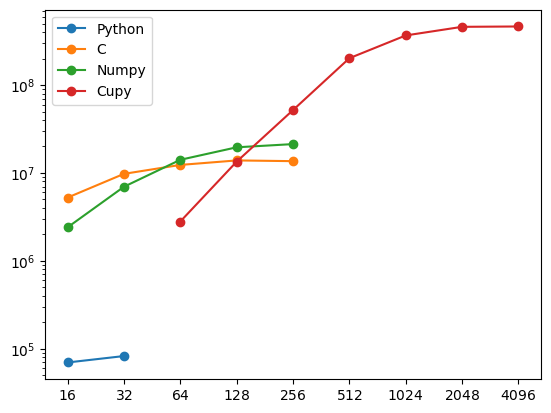

In [4]:
for name in X.keys():
    plt.semilogy(['$'+str(i)+'$' for i in X[name]], Y[name], 'o-', label=name)
plt.legend()
plt.show()

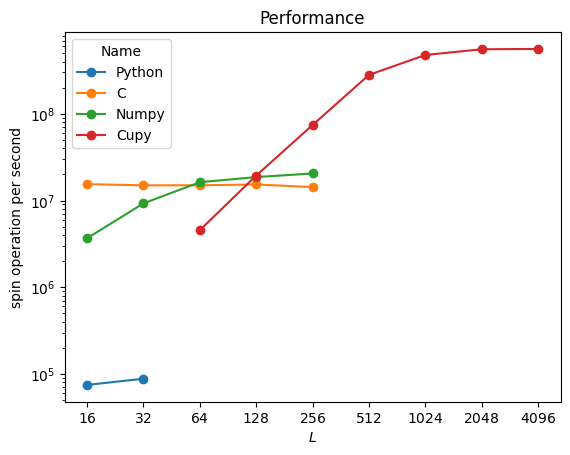

In [5]:
fig, ax = plt.subplots()
for name in X.keys():
    ax.semilogy(['$'+str(i)+'$' for i in X[name]], Y1[name], 'o-', label=name)
    
ax.set_ylabel('spin operation per second')
ax.set_xlabel('$L$')
ax.set_title('Performance')
ax.legend(title='Name')
#plt.legend()
plt.show()
fig.savefig('performance.png')

In [6]:
max(Y1['Cupy'])/max(Y1['C']), max(Y1['C'])/max(Y1['Python'])

(36.335684076816726, 175.57822591084965)

https://numpydoc.readthedocs.io/en/latest/format.html

https://docs.python.org/3/library/pydoc.html